In [409]:
import numpy as np
import pandas as pd

automobile = pd.read_csv("Automobile_data.csv")
automobile = automobile.replace({'?': None})


In [410]:
#divide data into numeric and categorical data
auto_cat = automobile.iloc[:, [2,3,4,5,6,7,8,14,15,17]]
auto_num = automobile.iloc[:,[0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]]


auto_num_median_imputed = auto_num.fillna(auto_num.median())
auto_cat_most_common_imputed = auto_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
auto_num_median_imputed = auto_num_median_imputed.astype(float)

auto_imputed = pd.concat([auto_cat_most_common_imputed,auto_num_median_imputed], axis=1, ignore_index=True)
auto_imputed.columns = ["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system","symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
auto_imputed

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,...,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,...,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,...,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,...,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [411]:
auto_cat_most_common_imputed.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,116,96,120,202,148,159,94


In [412]:
auto_imputed.groupby("make").agg({"price": "mean"}).rename(columns={"price": "avg_price"}).sort_values(by = ["avg_price"],ascending = False)

,avg_price
make,
jaguar,34600.000000
mercedes-benz,33647.000000
porsche,27179.400000
bmw,26118.750000
volvo,18063.181818
audi,16778.571429
mercury,16503.000000
alfa-romero,15498.333333
peugot,15489.090909


In [474]:
auto_imputed.groupby("make").agg({"engine-size": "mean"}).rename(columns={"engine-size": "avg_engine_size"}).sort_values(by = ["avg_engine_size"],ascending = False)

,avg_engine_size
make,
jaguar,280.666667
mercedes-benz,226.500000
porsche,187.200000
bmw,166.875000
volvo,142.272727
mercury,140.000000
alfa-romero,137.333333
peugot,135.818182
renault,132.000000


In [476]:
auto_imputed.groupby("make").agg({"horsepower": "mean"}).rename(columns={"horsepower": "avg_horsepower"}).sort_values(by = ["avg_horsepower"],ascending = False)

,avg_horsepower
make,
porsche,210.400000
jaguar,204.666667
mercury,175.000000
mercedes-benz,146.250000
bmw,138.875000
volvo,128.000000
saab,126.666667
alfa-romero,125.333333
audi,121.000000


In [413]:
# Deal only with numeric

# Compute the correlation matrix
corr = auto_num_median_imputed.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457484,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.132563,-0.004928,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149
normalized-losses,0.457484,1.000000,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.072536,-0.050428,0.046739,-0.114772,0.166964,0.241134,-0.189530,-0.149357,0.095489
wheel-base,-0.531954,-0.073709,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.489556,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847
length,-0.357612,-0.006837,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607016,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567
width,-0.232919,0.058378,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559262,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558
height,-0.541038,-0.365674,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.173506,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439
curb-weight,-0.227691,0.064343,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648848,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817
engine-size,-0.105790,0.072536,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.585636,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343
bore,-0.132563,-0.050428,0.489556,0.607016,0.559262,0.173506,0.648848,0.585636,1.000000,-0.056054,0.005468,0.574258,-0.256600,-0.582627,-0.585352,0.532861
stroke,-0.004928,0.046739,0.159684,0.128622,0.182708,-0.058994,0.168164,0.200246,-0.056054,1.000000,0.185679,0.083804,-0.059716,-0.044973,-0.046389,0.083627


In [414]:
new_corr = corr.abs().mean(axis=0)
new_corr.sort_values(ascending=False)

#length and curb_weight have the overall higihest correlation

curb-weight          0.582481
length               0.558010
width                0.539845
wheel-base           0.526445
engine-size          0.509070
highway-mpg          0.504907
city-mpg             0.498622
price                0.493791
horsepower           0.485772
bore                 0.427502
height               0.303104
peak-rpm             0.273309
symboling            0.266624
compression-ratio    0.238712
normalized-losses    0.197086
stroke               0.156895
dtype: float64

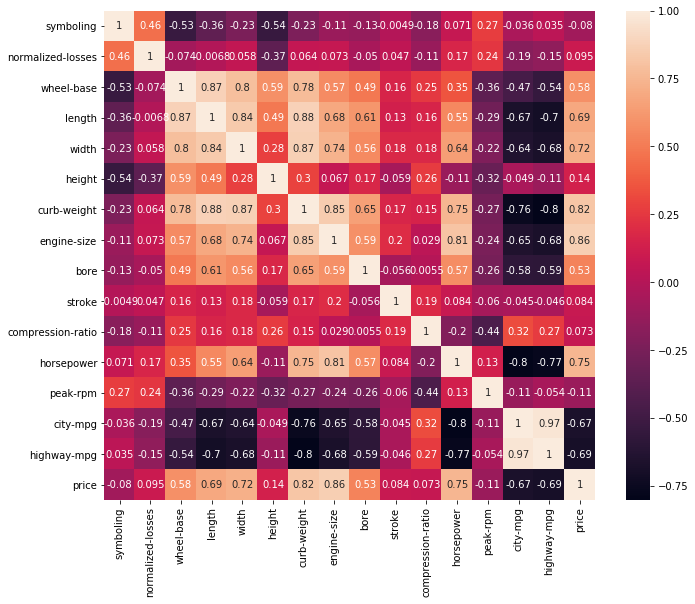

In [472]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)
plt.show()

# focusing on correlation with price, we can see that the more curb weight of your car, it is very likely to have a higher price.
# other important factor would include width, engine size, length, wheel base, and horse power.
# in conclusion, the bigger and more powerful you car is, it is more likely to be more expensive.

C:\Users\charl\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


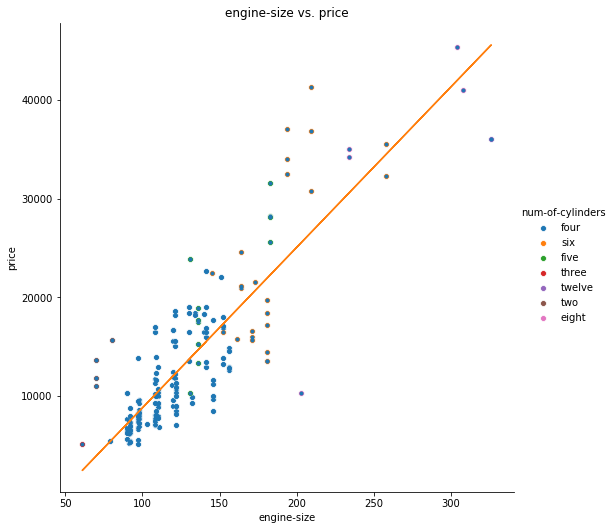

In [473]:
sns.pairplot(x_vars=["engine-size"], y_vars=["price"], data=auto_imputed, hue="num-of-cylinders", size=7)

from numpy.polynomial.polynomial import polyfit
b, m = polyfit(auto_imputed['engine-size'], auto_imputed['price'], 1)

plt.plot(auto_imputed['engine-size'], auto_imputed['price'], '.')
plt.plot(auto_imputed['engine-size'], b + m * auto_imputed['engine-size'], '-')
plt.title('engine-size vs. price')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

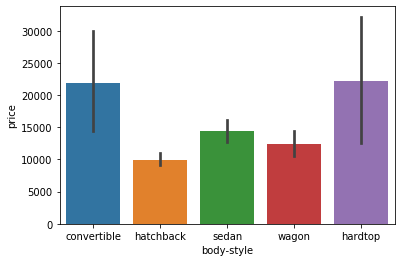

In [465]:
g = sns.barplot(x="body-style", y="price",
                data=auto_imputed, dodge=False)

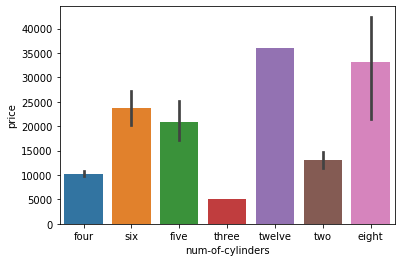

In [466]:
g = sns.barplot(x="num-of-cylinders", y="price",
                data=auto_imputed, dodge=False)

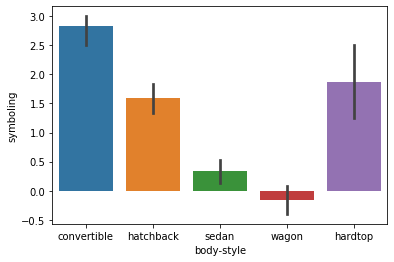

In [461]:
g = sns.barplot(x="body-style", y="symboling",
                data=auto_imputed, dodge=False)

In [382]:
#classification

X = auto_num_median_imputed.iloc[:, 0:15].to_numpy() #divide the data for classification purpose
Y = auto_num_median_imputed.iloc[:, 15].to_numpy()

# random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=10)

In [383]:
# Use LOOCV to classify species (1-dim)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(auto_num_median_imputed)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(auto_num_median_imputed[['length']].values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, Y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

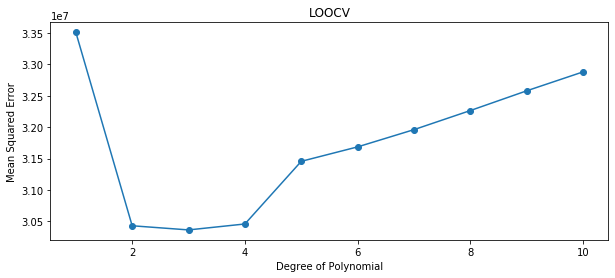

In [384]:
fig, (ax1) = plt.subplots(1, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    
# when degree of polynomial equals 2, it reaches the elbow point, which means the model will be most efficient at poly degree equals to 2.

In [385]:
import statsmodels.api as sm
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(auto_num_median_imputed[['length']].values.reshape(-1,1))
model = sm.OLS(Y,X_poly).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.52e-33
Time:                        00:39:02   Log-Likelihood:                -2053.5
No. Observations:                 205   AIC:                             4113.
Df Residuals:                     202   BIC:                             4123.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.034e+05   5.64e+04      3.604      0.0

In [386]:
# Use LOOCV to classify species (1-dim)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(auto_num_median_imputed)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(auto_num_median_imputed[['curb-weight']].values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, Y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

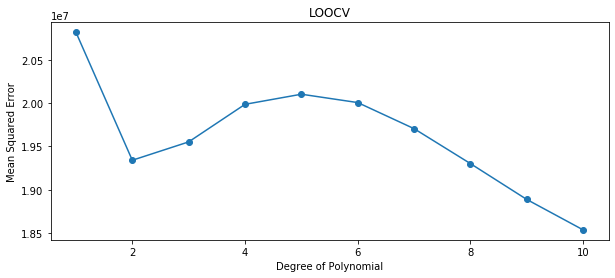

In [387]:
fig, (ax1) = plt.subplots(1, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    
# using both curb weight and length as classifier but both indicates that when poly degree equals 2 gives the most efficiency.

In [388]:
import statsmodels.api as sm
poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(auto_num_median_imputed[['curb-weight']].values.reshape(-1,1))
model = sm.OLS(Y,X_poly).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 03 May 2020   Prob (F-statistic):           5.83e-55
Time:                        00:39:08   Log-Likelihood:                -2000.0
No. Observations:                 205   AIC:                             4008.
Df Residuals:                     201   BIC:                             4021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.719e-41   2.21e-42     12.326      0.0

In [389]:
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

#encoding all categorical variables into numeric variables and drop missing values

cat_columns = auto_cat_most_common_imputed.columns

new_auto = auto_imputed
new_auto[cat_columns] = new_auto[cat_columns].astype("category")
new_auto[cat_columns] = new_auto[cat_columns].apply(lambda x: x.cat.codes)
new_auto


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,1,0,2,0,0,2,5,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,0,1,0,1,0,2,0,0,2,5,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,0,1,0,1,2,2,0,5,3,5,...,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,1,1,0,0,3,1,0,3,2,5,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,1,1,0,0,3,0,0,3,1,5,...,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,3,2,5,...,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,21,1,1,0,3,2,0,3,2,5,...,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,21,1,0,0,3,2,0,5,3,5,...,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,21,0,1,0,3,2,0,3,3,3,...,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [477]:
#height               0.330048
#symboling            0.278320
#compression-ratio    0.260975
#peak-rpm             0.255619
#normalized-losses    0.240627
#stroke               0.176329
#10,11,15,19,20,22
#since these variables have generally low correlation with other variables, remove them from predicting variables
X = new_auto.iloc[:,[ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]].to_numpy().astype('float') #divide the data for classification purpose
Y = new_auto.iloc[:, 0].to_numpy().astype('int')

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=10)

In [496]:
import sklearn.linear_model as skl_lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[3, 10, 30], 'max_features':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],'bootstrap':[True,False]}]
tree=RandomForestClassifier()
grid_search=GridSearchCV(tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Use Random Forest as our classifier

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [501]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [502]:
result=pd.DataFrame(grid_search.cv_results_['params'])
result['accuracy']=grid_search.cv_results_['mean_test_score']
result.sort_values('accuracy', ascending=False)

,bootstrap,max_features,n_estimators,accuracy
83,False,3,30,0.839524
19,True,7,10,0.833333
104,False,10,30,0.832857
91,False,6,10,0.832381
92,False,6,30,0.831905
...,...,...,...,...
24,True,9,3,0.617619
0,True,1,3,0.609524
15,True,6,3,0.595714
3,True,2,3,0.589048


In [499]:
from sklearn.metrics import accuracy_score

final_model=grid_search.best_estimator_
test_final_pred=final_model.predict(X_test)
accuracy_score(Y_test, test_final_pred)

0.7741935483870968

Confusion matrix
[[ 1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

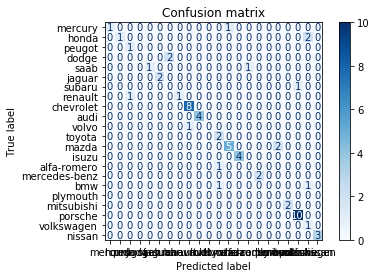

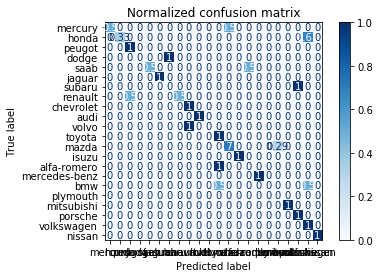

In [500]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

classifier = grid_search.best_estimator_

titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 display_labels=set(automobile["make"].values),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()